### Importing libraries

In [1]:
from matplotlib import pyplot as plt
from matplotlib import style
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics

In [2]:
# inserting style of plots
sns.set(font_scale=1.4)

### Load and Review Data
Healthscore.csv dataset will be analysed first before using in a machine learning model

#### Definition of features
From the metadata on the data source we have the following definition of the features.

| Feature  | Description | Comments |
|--------------|-------------|--------|
| Age | Age in Years | Somewhat negatively correlated with Salary (-0.302709) <br><br> Moderately (enough to take notice) negatively correlated with healthscore (-0.612955)|
| Sex | Male (0) or Female (1) | Strongly negatively correlated with weight in lbs (-0.811196) and height in inch (-0.689318) <br><br> Somewhat positively correlated with healthscore (0.311961) |
| Weight in lbs | Weight in lbs | Moderately positively correlated with height in inch. Although different heights have a variety of different weights (vice-versa), this could be correlated due to the reasoning that the taller someone's height, the more they will weigh as they contain more mass. (0.566909) <br><br> Somewhat negatively correlated with healthscore (-0.305856) |
| Height in Inch | Height in Inch |
| IQ | A number representing a person's reasoning ability as compared to the statistical norm or average for their age, taken as 100. |
| Units of Alcohol per day | The amount of alcohol intake per day | Interesting Note: Units of alcohol consumed per day has no correlation with healthscore |
| Cigarettes per day | The number of cigarettes smoked per day | Slight negative correlation with healthscore (-0.278007)
| Marital Status | Single (0), Married (1), Divorced (2), Widowed (3), Cohabiting (4) |
| Additional People in Household | The number of additional people living in the same household |
| Salary | Salary per year |
| Active | How much exercise; Inactive (0), Active (1), Very Active (2) | Moderate positive correlation with Health Score (0.506648) |
| Health Score (high is good) | Higher the score, the healthier a person is | *Class Variable* |

In [3]:
# read data from csv file
# df - dataframe
df = pd.read_csv('HealthScores.csv')

In [4]:
# 11 feature columns
# 1 class variable - 'HealthScore'
df.head()

,Age,Sex,Weight in lbs,Height in Inch,IQ,Units of alcohol per day,Cigarettes per day,Marital Status,Additional People in household,Salary,Active,Health Score (high is good)
0,58,Female,120,62,103,0,0,Divorced,2,56588,Inactive,150
1,45,Female,106,63,101,2,0,Married,2,52836,Inactive,118
2,63,Female,138,67,109,2,0,Divorced,1,54838,Inactive,90
3,26,Female,126,69,96,2,0,Cohabiting,1,54853,Inactive,165
4,67,Female,133,65,101,2,0,Single,0,24976,Inactive,86


In [5]:
# checking for any null values in the dataframe
# False - no null values detected
df.isnull().values.any()

False

In [6]:
# checking structure of dataframe
# dataframe has 5079 rows, 12 columns
df.shape

(5079, 12)

In [7]:
# need to change the columns to integer values
# from string so that they can be used be used
# for analysis and in the model

df['Sex'] = df['Sex'].map({'Male': 0, 'Female': 1})
df['Active'] = df['Active'].map({'Inactive': 0, 'Active': 1, 'Very Active': 2})
df['Marital Status'] = df['Marital Status'].map({'Single': 0, 'Married': 1, 'Divorced': 2,
                                                  'Widowed': 3, 'Cohabiting': 4})

In [8]:
# generates statistics for each df column
df.describe()

,Age,Sex,Weight in lbs,Height in Inch,IQ,Units of alcohol per day,Cigarettes per day,Marital Status,Additional People in household,Salary,Active,Health Score (high is good)
count,5079.000000,5079.000000,5079.000000,5079.000000,5079.000000,5079.000000,5079.000000,5079.000000,5079.000000,5079.000000,5079.000000,5079.000000
mean,48.780075,0.639102,141.157314,68.132703,100.084859,0.989565,4.033668,1.723765,2.047844,44551.766096,0.662335,171.124631
std,18.219567,0.480308,25.248108,4.153906,6.006863,1.003778,9.567789,1.271947,1.228948,14339.105462,0.739360,70.971637
min,18.000000,0.000000,78.000000,55.000000,79.000000,0.000000,0.000000,0.000000,0.000000,24707.000000,0.000000,55.000000
25%,33.000000,0.000000,122.000000,65.000000,96.000000,0.000000,0.000000,1.000000,1.000000,25058.000000,0.000000,119.000000
50%,49.000000,1.000000,137.000000,68.000000,100.000000,1.000000,0.000000,1.000000,2.000000,54120.000000,1.000000,157.000000
75%,65.000000,1.000000,162.000000,71.000000,104.000000,2.000000,0.000000,3.000000,3.000000,55402.000000,1.000000,206.000000
max,80.000000,1.000000,218.000000,82.000000,123.000000,7.000000,40.000000,4.000000,4.000000,59532.000000,2.000000,489.000000


In [9]:
# possible gender imbalance, could try balancing number of male
# and female participants using either upsampling to duplicate
# male records or remove female records
df['Sex'].value_counts()

1    3246
0    1833
Name: Sex, dtype: int64

/Users/LiamMcilwee/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


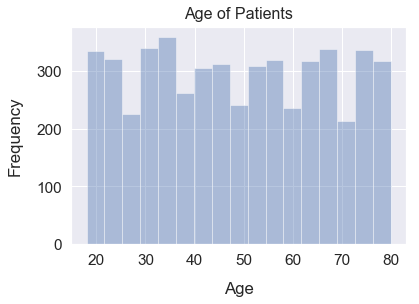

In [10]:
sns.distplot(df['Age'], color='b', kde=False, hist_kws={"range": [18, 80]})
plt.title("Age of Patients", fontsize=16, y=1.01)
plt.xlabel("Age", labelpad=14)
plt.ylabel("Frequency", labelpad=14);
plt.show()

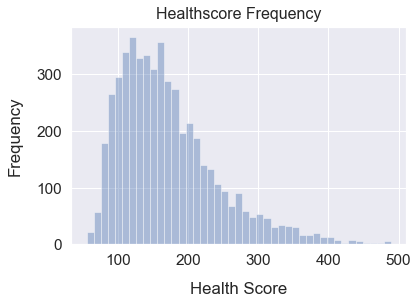

In [11]:
sns.distplot(df['Health Score (high is good)'], color='b', kde=False)
plt.title("Healthscore Frequency", fontsize=16, y=1.01)
plt.xlabel("Health Score", labelpad=14)
plt.ylabel("Frequency", labelpad=14);
plt.show()
# data is skewed left

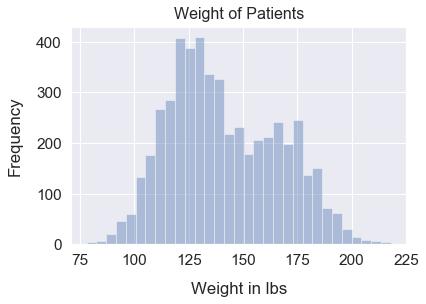

In [12]:
sns.distplot(df['Weight in lbs'], color='b', kde=False)
plt.title("Weight of Patients", fontsize=16, y=1.01)
plt.xlabel("Weight in lbs", labelpad=14)
plt.ylabel("Frequency", labelpad=14);
plt.show()

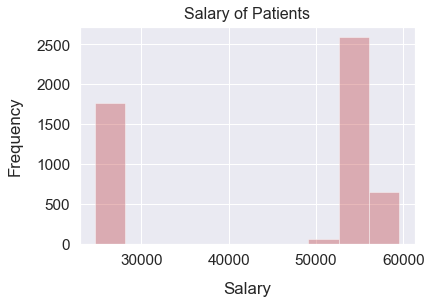

In [13]:
sns.distplot(df['Salary'], color='r', kde=False)#, hist_kws={"range": [24000, 60000]})
plt.title("Salary of Patients", fontsize=16, y=1.01)
plt.xlabel("Salary", labelpad=14)
plt.ylabel("Frequency", labelpad=14);
plt.show()

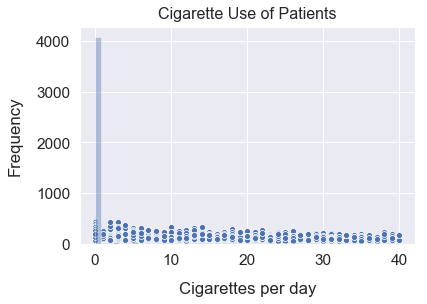

In [14]:
#print(df['Cigarettes per day'].mean())
#cig_0 = (df['Cigarettes per day'] == 0).value_counts()
#cig
#print(cig_0)
#sns.set()
#plt.plot(df['Cigarettes per day'].mean, df['Health Score (high is good)'])
#plt.show()
counts = df['Cigarettes per day'].value_counts().sort_index()
counts.describe()
sns.scatterplot(df['Cigarettes per day'], df['Health Score (high is good)'], color='b')
sns.distplot(df['Cigarettes per day'], color='b', kde=False)
plt.title("Cigarette Use of Patients", fontsize=16, y=1.01)
plt.xlabel("Cigarettes per day", labelpad=14)
plt.ylabel("Frequency", labelpad=14);
plt.show()

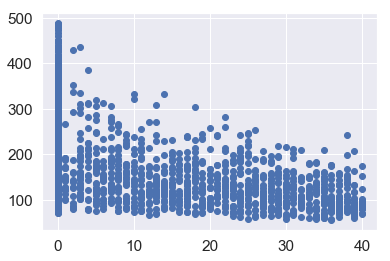

In [15]:
plt.scatter(df['Cigarettes per day'], df['Health Score (high is good)'])

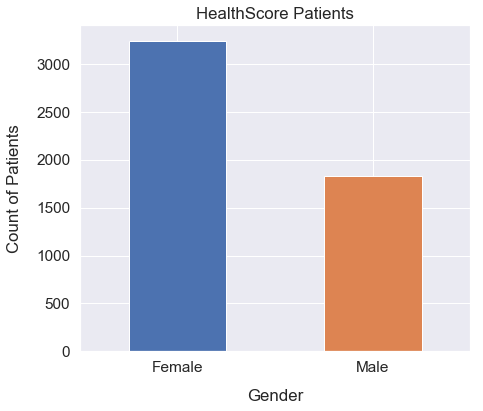

In [16]:
sns.set(font_scale=1.4)
df['Sex'].value_counts().plot(kind='bar', figsize=(7,6), rot=0)
plt.xlabel('Gender', labelpad=14)
plt.ylabel('Count of Patients', labelpad=14)
plt.xticks([0, 1], ['Female', 'Male'])
plt.title('HealthScore Patients')
plt.show()

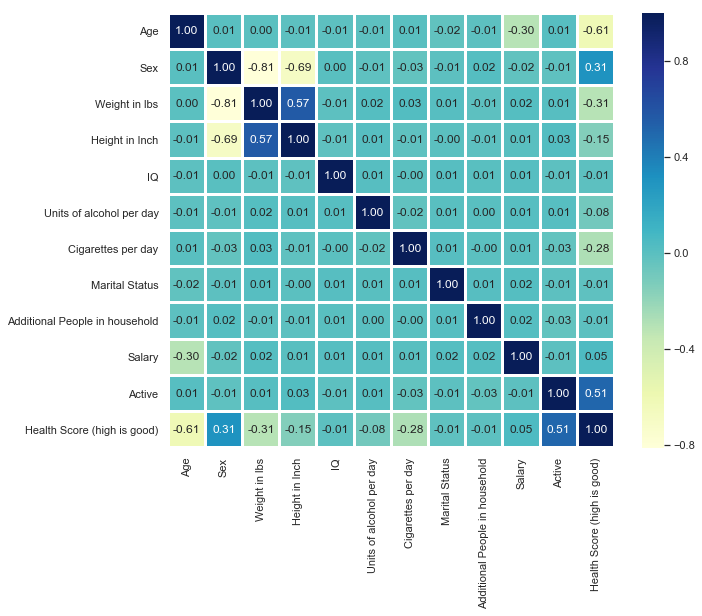

In [17]:
# Plots a correlation matrix for each pair of columns
# in the dataset to check if any are highly correlated
sns.set(font_scale=1)
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu', fmt='.2f', linewidths=2)
plt.show()

In [18]:
# no data feature is heavily correlated therefore 
# there is no need to remove any feature
# features with strong correlation has been commented in the metadata above
df.corr()

,Age,Sex,Weight in lbs,Height in Inch,IQ,Units of alcohol per day,Cigarettes per day,Marital Status,Additional People in household,Salary,Active,Health Score (high is good)
Age,1.000000,0.008819,0.001486,-0.005537,-0.008018,-0.008363,0.008459,-0.018802,-0.006900,-0.302709,0.010348,-0.612955
Sex,0.008819,1.000000,-0.811196,-0.689318,0.003109,-0.013531,-0.032880,-0.008168,0.018582,-0.019124,-0.014939,0.311961
Weight in lbs,0.001486,-0.811196,1.000000,0.566909,-0.006593,0.023422,0.028075,0.010227,-0.009851,0.022077,0.009809,-0.305856
Height in Inch,-0.005537,-0.689318,0.566909,1.000000,-0.013403,0.013320,-0.014259,-0.001633,-0.009808,0.007780,0.029789,-0.145862
IQ,-0.008018,0.003109,-0.006593,-0.013403,1.000000,0.011317,-0.001163,0.013688,0.007986,0.012052,-0.009155,-0.007623
Units of alcohol per day,-0.008363,-0.013531,0.023422,0.013320,0.011317,1.000000,-0.023483,0.005300,0.003917,0.011111,0.011968,-0.082637
Cigarettes per day,0.008459,-0.032880,0.028075,-0.014259,-0.001163,-0.023483,1.000000,0.011380,-0.000053,0.005096,-0.028179,-0.278007
Marital Status,-0.018802,-0.008168,0.010227,-0.001633,0.013688,0.005300,0.011380,1.000000,0.014756,0.022847,-0.007485,-0.014594
Additional People in household,-0.006900,0.018582,-0.009851,-0.009808,0.007986,0.003917,-0.000053,0.014756,1.000000,0.017602,-0.027730,-0.009982
Salary,-0.302709,-0.019124,0.022077,0.007780,0.012052,0.011111,0.005096,0.022847,0.017602,1.000000,-0.008590,0.050592


### Splitting the data

80% for training,
20% for testing

In [108]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# using all features, before choosing a fewer amount which have higher correlation
all_feature_col = ['Age', 'Sex', 'Weight in lbs', 'Height in Inch', 'IQ',
                   'Units of alcohol per day', 'Cigarettes per day', 'Marital Status',
                   'Additional People in household', 'Salary', 'Active']

select_feature_col = ['Age', 'Sex', 'Active', 'Cigarettes per day',
                      'Weight in lbs', 'Height in Inch', 
                      'Units of alcohol per day']

predicted_class = ['Health Score (high is good)']

X_all = df[all_feature_col].values # predictor feature col (11 x m)
X = df[select_feature_col].values # predictor feature col (6 x m)
y = df[predicted_class].values

# data is scaled so that support vector machine has correct prediction
# this is mostly due to the 'Salary' column
X_all = preprocessing.scale(X_all)
#X = preprocessing.scale(X)

# using all features
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y, 
                                                            test_size=0.2, random_state=0)

# using few select features which are correlated
# this will be the main data to test the models
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

/Users/LiamMcilwee/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


### User-defined methods

In [125]:
def metricScore(y_test, y_pred):
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('Explained Variance Score:', metrics.explained_variance_score(y_test, y_pred))

In [126]:
from sklearn.model_selection import RepeatedKFold
# function to perform Repeated KFOLD analysis
# on an estimator
# input - estimator e.g. linearReg
def kfoldSplitAnalysis(estimator):
    kfold = RepeatedKFold(n_splits=10, n_repeats=10, random_state=0)
    for train_index, test_index in kfold.split(X):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        estimator.fit(X_train, y_train)
        print(estimator.score(X_test, y_test))

In [ ]:
# gives an accuracy score by comparing the difference
# in values between the actual and predicted scores
# which are categorised by a range of +/- 30
def accuracyHealthScore():
    print('|Actual| |Predicted| |Difference|')
    
    accurate_count = 0 
    inaccurate_count = 0
    for index, y_actual in enumerate(y_test):
        diff = y_actual - y_prediction[index]
        if diff >= -30 and diff <= 30:
            print(y_actual , y_prediction[index], diff)
            accurate_count += 1
        else:
            inaccurate_count += 1
            
    print('Accurate:', accurate_count, 'Inaccurate:', inaccurate_count)
    print('Accuracy:', (accurate_count / 
                        (accurate_count + inaccurate_count)), '%')

### Linear Regression
1st algorithm

In [131]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# score using select features
linearReg = LinearRegression().fit(X_train, y_train)
y_prediction = linearReg.predict(X_test)
print('R^2 score of select features:', linearReg.score(X_test, y_test))

R^2 score of select features: 0.8241899587378947


In [132]:
metricScore(y_test, y_prediction)

Mean Absolute Error: 21.896333548554605
Mean Squared Error: 828.5522893305882
Root Mean Squared Error: 28.784584230636167
Explained Variance Score: 0.824190170016227


In [115]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(linearReg, X_test, y_test, cv=10)
print(scores)

[0.81388503 0.81040127 0.83027573 0.8574611  0.80726827 0.79594139
 0.84870448 0.77758937 0.83240501 0.83607211]


In [25]:
kfoldSplitAnalysis(linearReg)

0.8253840585889931
0.8221392813586448
0.8079868976249036
0.8357364306674439
0.8265961836453593
0.831002904161724
0.8125551293254002
0.8264001614657502
0.836537109659784
0.8300220558337321
0.8150942813749728
0.8394420478365262
0.833923487824542
0.8076590251273355
0.8185213494164194
0.8208419395021838
0.8329109930128624
0.8404410423152185
0.8273233048986505
0.807454502755574
0.8222896725357479
0.8271354820030119
0.839817365003157
0.8283203441788417
0.8253263336540952
0.8425400793449774
0.8309643975300677
0.8102920570940297
0.8018809040628249
0.819820120515172
0.8337514881615196
0.8237290681781437
0.8183129430898121
0.8151996695987854
0.8219716390159709
0.8222352479165386
0.8377688439507041
0.8369395939631112
0.8180543440981132
0.8243076023613883
0.8281537394543244
0.82181455152778
0.8197697421105762
0.8218603843266212
0.8466423705637326
0.8156336332068713
0.8416820672274598
0.8239139007442311
0.815585002165053
0.8150310155784598
0.8318800197963184
0.8264083055278656
0.8387177983718997
0.

In [133]:
accuracyHealthScore()

|Actual| |Predicted| |Difference|
[177] [176.41687951] [0.58312049]
[89] [59.61667339] [29.38332661]
[224] [239.07122917] [-15.07122917]
[158] [142.90266301] [15.09733699]
[162] [167.6135523] [-5.6135523]
[124] [140.01428368] [-16.01428368]
[111] [94.8733077] [16.1266923]
[183] [199.13145297] [-16.13145297]
[278] [284.90087974] [-6.90087974]
[185] [202.51475138] [-17.51475138]
[123] [101.08141012] [21.91858988]
[133] [137.33066686] [-4.33066686]
[194] [186.71816587] [7.28183413]
[261] [236.03469973] [24.96530027]
[176] [185.75317794] [-9.75317794]
[104] [104.90039731] [-0.90039731]
[75] [74.09369157] [0.90630843]
[156] [148.2966576] [7.7033424]
[79] [87.84730731] [-8.84730731]
[111] [112.63705302] [-1.63705302]
[197] [189.0136018] [7.9863982]
[214] [225.84242547] [-11.84242547]
[189] [180.58344853] [8.41655147]
[91] [71.72396571] [19.27603429]
[172] [194.49698245] [-22.49698245]
[215] [213.91040966] [1.08959034]
[115] [131.16479674] [-16.16479674]
[120] [108.50516642] [11.49483358]
[11

[215] [231.00175819] [-16.00175819]
[240] [263.34356383] [-23.34356383]
[117] [111.20592489] [5.79407511]
[168] [175.50699276] [-7.50699276]
[149] [137.42032425] [11.57967575]
[141] [141.65025437] [-0.65025437]
[206] [218.03062318] [-12.03062318]
[135] [157.75400052] [-22.75400052]
[190] [209.81889935] [-19.81889935]
[104] [109.54970261] [-5.54970261]
[120] [96.01326177] [23.98673823]
[183] [186.77781371] [-3.77781371]
[155] [175.00403143] [-20.00403143]
[139] [155.79206564] [-16.79206564]
[181] [194.78469611] [-13.78469611]
[272] [244.1381584] [27.8618416]
[104] [86.72394981] [17.27605019]
[166] [188.33646047] [-22.33646047]
[216] [231.99318173] [-15.99318173]
[149] [124.76989998] [24.23010002]
[100] [85.42549045] [14.57450955]
[198] [212.49037622] [-14.49037622]
[213] [227.24229063] [-14.24229063]
[204] [190.55733598] [13.44266402]
[144] [147.74414319] [-3.74414319]
[146] [164.14765963] [-18.14765963]
[119] [135.26336714] [-16.26336714]
[117] [115.70447579] [1.29552421]
[101] [81.770

[125] [133.76430808] [-8.76430808]
[235] [232.67309434] [2.32690566]
[140] [144.64569472] [-4.64569472]
[185] [199.85610219] [-14.85610219]
[210] [181.8098579] [28.1901421]
[246] [247.26397999] [-1.26397999]
[236] [209.06470655] [26.93529345]
[106] [112.97729283] [-6.97729283]
[177] [196.99978116] [-19.99978116]
[165] [154.39324237] [10.60675763]
[184] [166.6072253] [17.3927747]
[167] [155.49622896] [11.50377104]
[160] [146.32980546] [13.67019454]
[124] [99.7016786] [24.2983214]
[151] [152.79529407] [-1.79529407]
[226] [215.16289611] [10.83710389]
[123] [137.02811731] [-14.02811731]
[107] [110.80579981] [-3.80579981]
[211] [228.12439135] [-17.12439135]
[147] [157.61136915] [-10.61136915]
[122] [138.92805725] [-16.92805725]
[270] [242.16005753] [27.83994247]
[230] [215.21442092] [14.78557908]
[136] [120.53422332] [15.46577668]
[151] [144.99622589] [6.00377411]
[160] [148.85002037] [11.14997963]
[99] [70.94480744] [28.05519256]
[195] [210.05364014] [-15.05364014]
[159] [151.57136912] [7.

R2 Score: 0.37929144964825456


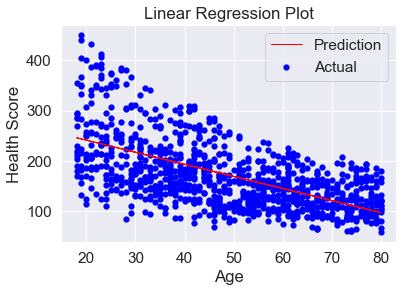

R2 Score: 0.09923773088480903


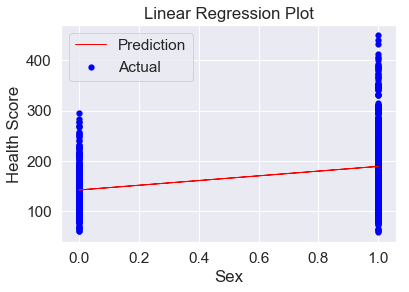

R2 Score: 0.2553971893774819


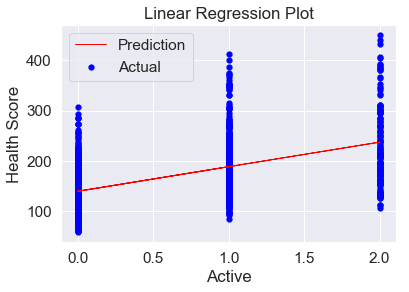

R2 Score: 0.076129500396096


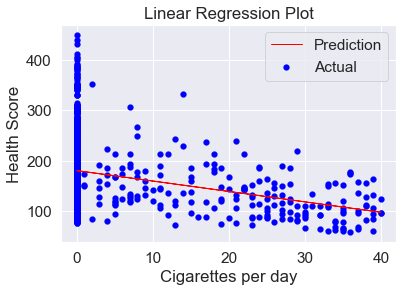

R2 Score: 0.09639582986878814


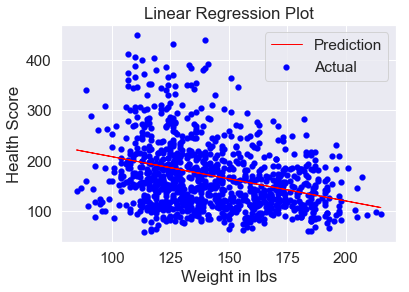

R2 Score: 0.023250737498229035


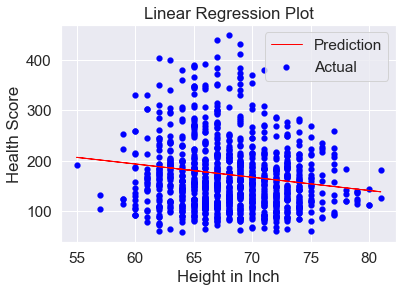

R2 Score: 0.007934813357395765


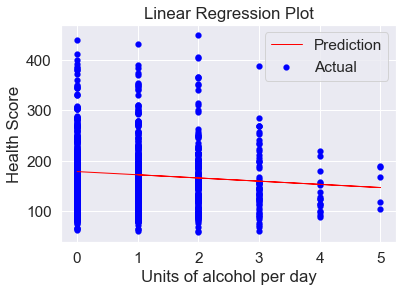

In [128]:
for index, featurename in enumerate(select_feature_col):
    
    sns.set(font_scale=1.4)
    X_train_index = X_train[:, index]
    X_test_index = X_test[:, index] # select all rows in the age column

    X_train_index = X_train_index.reshape(-1, 1)
    X_test_index = X_test_index.reshape(-1, 1)
    linearReg.fit(X_train_index, y_train)
    print('R2 Score:', linearReg.score(X_train_index, y_train))
    y_prediction = linearReg.predict(X_test_index)

    plt.scatter(X_test_index, y_test,  color='blue', linewidth=0.2)
    plt.plot(X_test_index, y_prediction, color='red', linewidth=1)
    plt.title('Linear Regression Plot')
    plt.xlabel(featurename) # independent variable
    plt.ylabel('Health Score') # dependent variable
    plt.legend(['Prediction', 'Actual'])
    plt.show()

### Random Forest Regressor
2nd Algorithm

In [141]:
from sklearn.ensemble import RandomForestRegressor

forestReg = RandomForestRegressor(n_estimators=200, random_state=0)
forestReg.fit(X_train, y_train)

/Users/LiamMcilwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [142]:
print(forestReg.score(X_test, y_test))
y_prediction = forestReg.predict(X_test)

0.9239585502758151


In [143]:
metricScore(y_test, y_prediction)

Mean Absolute Error: 14.328082267060367
Mean Squared Error: 358.36586352346484
Root Mean Squared Error: 18.930553703562524
Explained Variance Score: 0.9239586121721045


In [146]:
accuracyHealthScore()

|Actual| |Predicted| |Difference|
[305] 285.475 [19.525]
[89] 85.38 [3.62]
[160] 168.53 [-8.53]
[224] 237.5 [-13.5]
[158] 145.35 [12.65]
[162] 168.275 [-6.275]
[124] 129.08 [-5.08]
[111] 87.74 [23.26]
[183] 191.45 [-8.45]
[278] 278.31 [-0.31]
[185] 203.305 [-18.305]
[123] 111.67 [11.33]
[451] 460.95 [-9.95]
[133] 130.665 [2.335]
[261] 235.645 [25.355]
[176] 172.28 [3.72]
[104] 108.175 [-4.175]
[79] 95.97 [-16.97]
[111] 114.915 [-3.915]
[99] 111.89 [-12.89]
[113] 96.91 [16.09]
[101] 123.595 [-22.595]
[345] 339.94 [5.06]
[197] 196.99 [0.01]
[214] 240.635 [-26.635]
[189] 168.975 [20.025]
[91] 96.25 [-5.25]
[172] 174.75 [-2.75]
[215] 203.87 [11.13]
[115] 134.08 [-19.08]
[120] 115.51 [4.49]
[119] 119.99 [-0.99]
[132] 112.305 [19.695]
[75] 103.945 [-28.945]
[155] 165.665 [-10.665]
[133] 137.815 [-4.815]
[98] 107.11 [-9.11]
[64] 84.76 [-20.76]
[225] 223.1 [1.9]
[212] 226.81 [-14.81]
[169] 164.52 [4.48]
[204] 211.44 [-7.44]
[211] 205.575 [5.425]
[65] 70.165 [-5.165]
[81] 107.89 [-26.89]
[160] 

[141] 130.095 [10.905]
[162] 162.115 [-0.115]
[206] 216.165 [-10.165]
[135] 126.465 [8.535]
[190] 211.57 [-21.57]
[104] 111.61 [-7.61]
[83] 85.305 [-2.305]
[120] 91.46 [28.54]
[77] 75.455 [1.545]
[183] 171.52 [11.48]
[155] 175.86 [-20.86]
[139] 144.915 [-5.915]
[181] 194.44 [-13.44]
[272] 247.735 [24.265]
[103] 115.73 [-12.73]
[283] 257.05 [25.95]
[104] 101.85 [2.15]
[166] 172.945 [-6.945]
[365] 379.7 [-14.7]
[216] 221.195 [-5.195]
[149] 149.27 [-0.27]
[100] 110.92 [-10.92]
[198] 214.815 [-16.815]
[213] 217.045 [-4.045]
[144] 137.505 [6.495]
[107] 102.305 [4.695]
[146] 169.51 [-23.51]
[119] 114.63 [4.37]
[117] 126.06 [-9.06]
[101] 95.71 [5.29]
[140] 140.14 [-0.14]
[171] 148.885 [22.115]
[164] 184.385 [-20.385]
[90] 87.985 [2.015]
[120] 120.65 [-0.65]
[183] 175.285 [7.715]
[121] 125.765 [-4.765]
[161] 178.41 [-17.41]
[80] 80.93 [-0.93]
[295] 304.24 [-9.24]
[180] 183.34 [-3.34]
[151] 166.245 [-15.245]
[159] 156.815 [2.185]
[150] 139.83 [10.17]
[86] 104.335 [-18.335]
[100] 115.595 [-15.59

[230] 218.935 [11.065]
[136] 123.975 [12.025]
[151] 123.09 [27.91]
[213] 210.22 [2.78]
[160] 139.995 [20.005]
[99] 87.805 [11.195]
[195] 194.6 [0.4]
[159] 141.365 [17.635]
[113] 115.54 [-2.54]
[211] 203.805 [7.195]
[119] 113.24 [5.76]
[222] 199.54 [22.46]
[156] 171.825 [-15.825]
[113] 122.24 [-9.24]
[120] 124.44 [-4.44]
[118] 120.46 [-2.46]
[57] 74.91 [-17.91]
[272] 271.755 [0.245]
[148] 151.9 [-3.9]
[207] 183.3 [23.7]
[114] 84.455 [29.545]
[152] 146.6 [5.4]
[177] 186.055 [-9.055]
[96] 109.72 [-13.72]
[225] 214.08 [10.92]
[156] 140.785 [15.215]
[160] 173.95 [-13.95]
[269] 274.62 [-5.62]
[103] 117.8 [-14.8]
[167] 188.43 [-21.43]
[105] 110.79 [-5.79]
[172] 171.78 [0.22]
[164] 176.12 [-12.12]
[235] 232.16 [2.84]
[95] 95.535 [-0.535]
[155] 141.71 [13.29]
[157] 156.695 [0.305]
[129] 149.11 [-20.11]
[113] 108.96 [4.04]
[77] 82.99 [-5.99]
[120] 139.85 [-19.85]
[174] 175.04 [-1.04]
[433] 429.89 [3.11]
[199] 213.91 [-14.91]
[82] 80.755 [1.245]
[207] 192.135 [14.865]
[127] 142.9 [-15.9]
[308] 29

In [139]:
# Get numerical feature importances
importances = list(forestReg.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(select_feature_col, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

# performs marginally better when unimportant features are removed

Variable: Age                  Importance: 0.43
Variable: Active               Importance: 0.28
Variable: Sex                  Importance: 0.13
Variable: Cigarettes per day   Importance: 0.08
Variable: Weight in lbs        Importance: 0.04
Variable: Height in Inch       Importance: 0.02
Variable: Units of alcohol per day Importance: 0.01


In [145]:
# commented out to prevent image saved
'''from sklearn.tree import export_graphviz
import pydot

# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(X_train, y_train)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', 
                feature_names=select_feature_col, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_pdf('small_tree.pdf');'''

/Users/LiamMcilwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


### 3rd Algorithm
3rd Algorithm

In [147]:
from sklearn.svm import SVR

svmreg = SVR(kernel='linear')
svmreg.fit(X_train, y_train)
y_prediction = svmreg.predict(X_test)

/Users/LiamMcilwee/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [148]:
# performed badly when salary was included
print(svmreg.score(X_test, y_test))

0.8160974139425594


In [149]:
metricScore(y_test, y_prediction)

Mean Absolute Error: 21.250829465769424
Mean Squared Error: 866.6905917196372
Root Mean Squared Error: 29.43960923177543
Explained Variance Score: 0.8166024280621508


In [150]:
accuracyHealthScore()

|Actual| |Predicted| |Difference|
[177] 176.63816623318257 [0.36183377]
[89] 70.19927823087914 [18.80072177]
[224] 225.91057959534942 [-1.9105796]
[158] 146.6523248418655 [11.34767516]
[162] 168.38057401763058 [-6.38057402]
[124] 145.17148068778465 [-21.17148069]
[111] 96.65275468323512 [14.34724532]
[183] 192.29945659341888 [-9.29945659]
[278] 265.7169140177559 [12.28308598]
[185] 196.91112689034912 [-11.91112689]
[123] 107.00144437390395 [15.99855563]
[133] 141.25747797502686 [-8.25747798]
[194] 186.69446582785008 [7.30553417]
[176] 177.9242108991732 [-1.9242109]
[104] 113.0786174421794 [-9.07861744]
[75] 85.7984969792144 [-10.79849698]
[156] 153.31544621636408 [2.68455378]
[79] 95.91104218842361 [-16.91104219]
[111] 121.41538125519423 [-10.41538126]
[113] 90.74277526732317 [22.25722473]
[197] 184.38136920159582 [12.6186308]
[214] 218.44588791641422 [-4.44588792]
[189] 183.57061431540774 [5.42938568]
[91] 70.83079959866723 [20.1692004]
[172] 186.87525804478923 [-14.87525804]
[215] 20

[106] 81.4321134287004 [24.56788657]
[127] 123.05421213149225 [3.94578787]
[160] 170.13078039981906 [-10.1307804]
[117] 134.43090999837864 [-17.43091]
[157] 149.36510839986863 [7.6348916]
[168] 164.0087921566576 [3.99120784]
[131] 120.44961497186 [10.55038503]
[241] 212.91188969592463 [28.0881103]
[147] 150.454647170189 [-3.45464717]
[158] 136.3707880384884 [21.62921196]
[163] 151.97823471294964 [11.02176529]
[188] 197.94135619058056 [-9.94135619]
[128] 149.2520983420966 [-21.25209834]
[129] 149.5421077125486 [-20.54210771]
[87] 59.22061008652804 [27.77938991]
[194] 206.82536414182528 [-12.82536414]
[117] 97.90700028759443 [19.09299971]
[83] 110.88732655496119 [-27.88732655]
[285] 267.36493153443575 [17.63506847]
[275] 251.05574863900097 [23.94425136]
[126] 139.96062393691523 [-13.96062394]
[219] 215.67507231437617 [3.32492769]
[195] 203.21432007416865 [-8.21432007]
[145] 143.40650799638956 [1.593492]
[107] 122.22671725023088 [-15.22671725]
[157] 158.60375886388488 [-1.60375886]
[141] 